In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df=pd.read_csv(r"D:\Data Set\grameenphone_customer_churn.csv")
df.head(5)

,customer_id,age,gender,region,sim_type,package,monthly_recharge,call_minutes,data_usage_gb,tenure_months,churn
0,GP00001,56,Male,Barisal,Prepaid,Priyo Unlimited,467.0,213.0,0.28,13,No
1,GP00002,69,Female,Khulna,Prepaid,Djuice,256.0,120.0,3.08,39,No
2,GP00003,46,Female,Dhaka,Postpaid,Nishchinto,178.0,424.0,6.01,15,No
3,GP00004,32,Male,Rangpur,Prepaid,MyPlan,422.0,297.0,2.87,38,No
4,GP00005,60,Male,Barisal,Postpaid,Djuice,258.0,89.0,3.44,30,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   age               5000 non-null   int64  
 2   gender            5000 non-null   object 
 3   region            5000 non-null   object 
 4   sim_type          5000 non-null   object 
 5   package           5000 non-null   object 
 6   monthly_recharge  5000 non-null   float64
 7   call_minutes      5000 non-null   float64
 8   data_usage_gb     5000 non-null   float64
 9   tenure_months     5000 non-null   int64  
 10  churn             5000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 429.8+ KB


In [30]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,age,monthly_recharge,call_minutes,data_usage_gb,tenure_months
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,43.584600,307.381600,251.219000,3.063358,29.87880
std,14.919094,144.475338,100.473561,1.873711,16.99117
min,18.000000,50.000000,0.000000,0.000000,1.00000
25%,31.000000,201.000000,183.000000,1.620000,15.00000
50%,43.000000,307.000000,249.000000,3.010000,30.00000
75%,56.000000,408.000000,319.000000,4.340000,44.00000
max,69.000000,867.000000,631.000000,10.010000,59.00000


In [28]:
df['churn'].value_counts()

churn
No     4386
Yes     614
Name: count, dtype: int64

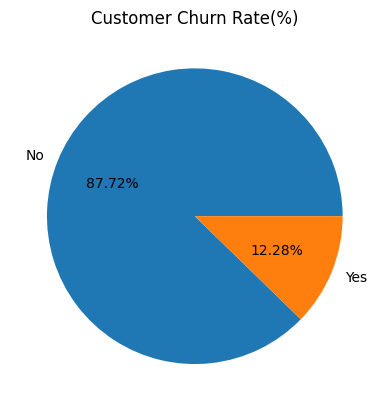

In [92]:
gb=df.groupby('churn').agg({'churn':'count'})
plt.pie(gb['churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Customer Churn Rate(%)')
plt.show()

monthly_recharge → distribution plot

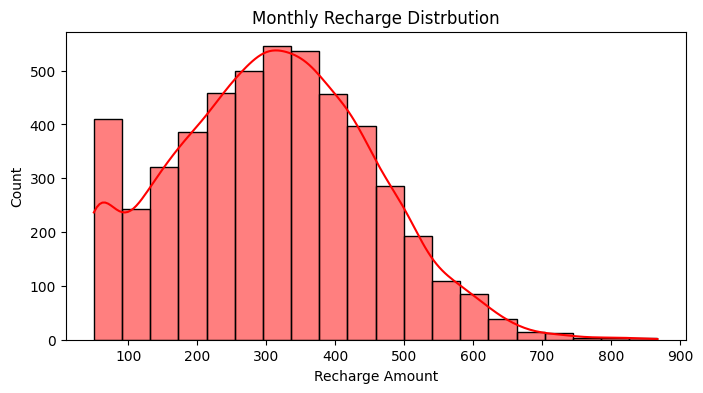

In [90]:
plt.figure(figsize=(8,4))
sns.histplot(df['monthly_recharge'], kde=True, color='red', edgecolor='black', bins=20)
plt.title('Monthly Recharge Distrbution')
plt.xlabel('Recharge Amount')
plt.ylabel('Count')
plt.show()

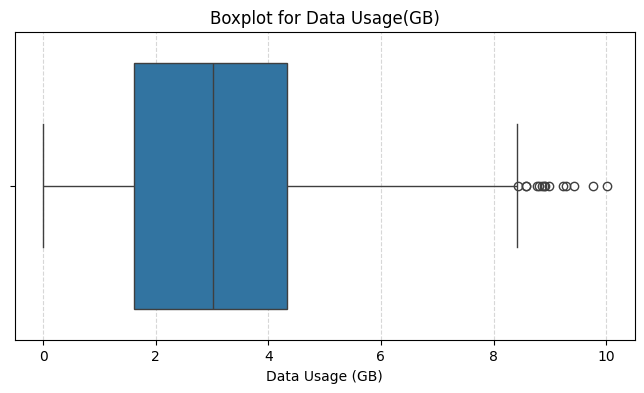

In [98]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['data_usage_gb'])
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('Boxplot for Data Usage(GB)')
plt.xlabel('Data Usage (GB)')
plt.show()

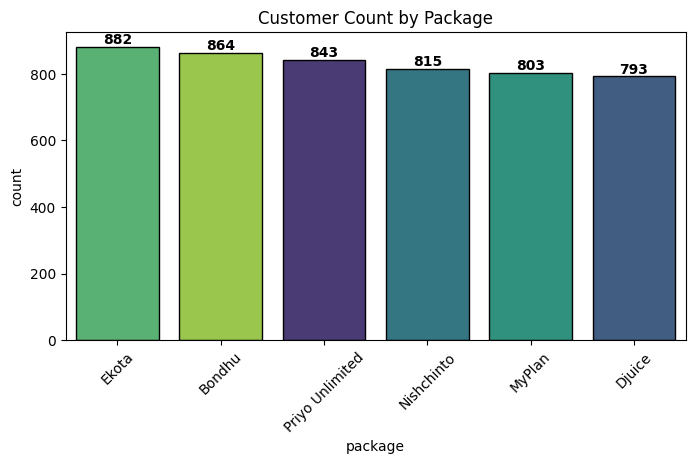

In [144]:
order= df['package'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(8,4))
ax = sns.countplot( data=df, x='package', hue='package', palette='viridis',order=order, legend=False, edgecolor='black')
# ax.bar_label(ax.containers[0], fontsize=10, color='black', weight='bold')
for container in ax.containers:
    ax.bar_label(container, weight='bold')
plt.title('Customer Count by Package')
plt.xticks(rotation=45)
plt.show()

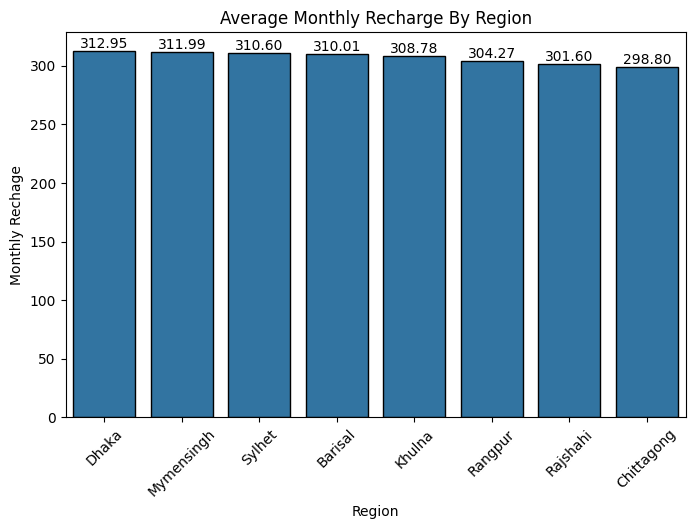

In [142]:
plt.figure(figsize=(8,5))
r_r=df.groupby('region')['monthly_recharge'].mean().reset_index()
r_r=r_r.sort_values(by='monthly_recharge', ascending=False)
order=r_r['region']
ax=sns.barplot(x='region', y='monthly_recharge', data=r_r, order=order, edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Average Monthly Recharge By Region')
plt.xlabel('Region')
plt.ylabel('Monthly Rechage')
plt.xticks(rotation=45)
plt.show()

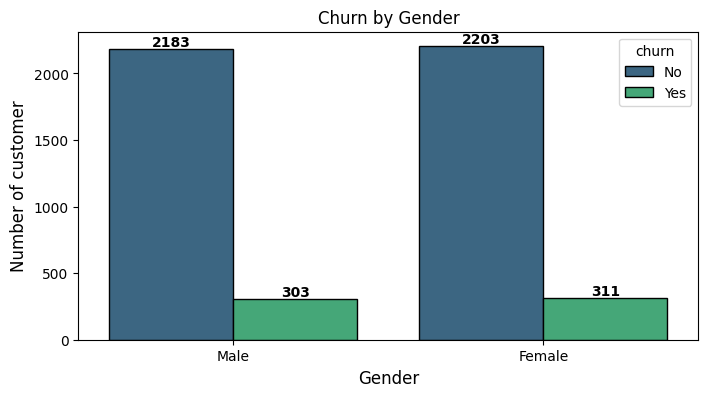

In [154]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='gender', data=df, hue='churn', palette='viridis', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, weight='bold')
plt.title('Churn by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of customer', fontsize=12)
plt.show()

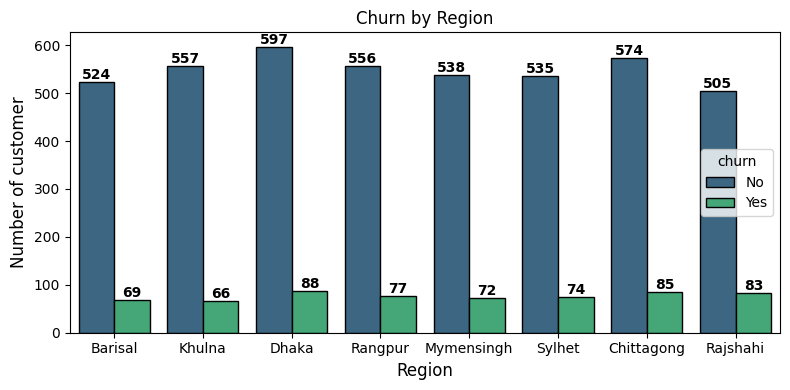

In [158]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='region', data=df, hue='churn', palette='viridis', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, weight='bold')
plt.title('Churn by Region')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of customer', fontsize=12)
plt.tight_layout()
plt.show()

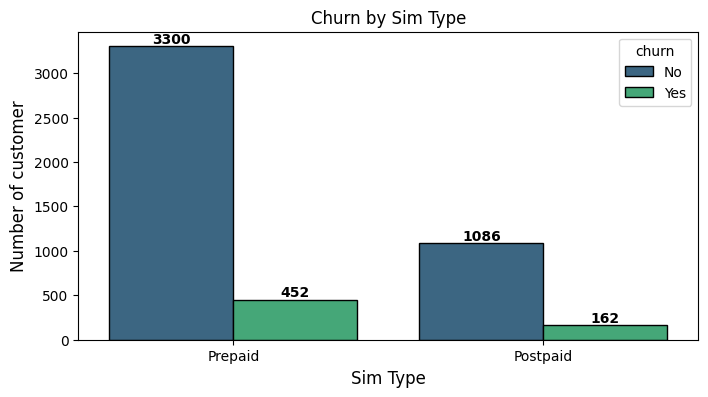

In [159]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='sim_type', data=df, hue='churn', palette='viridis', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, weight='bold')
plt.title('Churn by Sim Type')
plt.xlabel('Sim Type', fontsize=12)
plt.ylabel('Number of customer', fontsize=12)
plt.show()

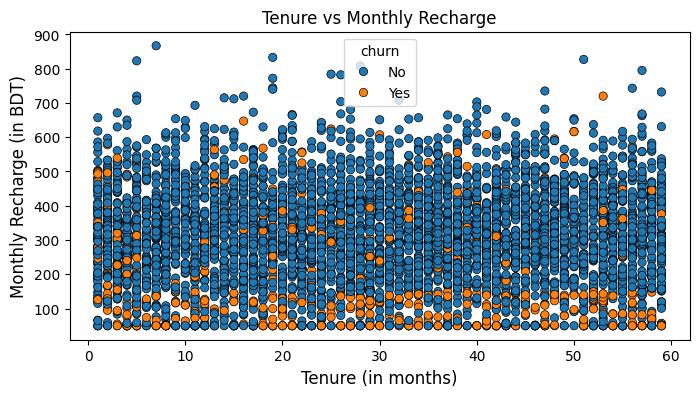

In [162]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='tenure_months', y='monthly_recharge', data=df, hue='churn', edgecolor='black')
# for container in ax.containers:
#     ax.bar_label(container, weight='bold')
plt.title('Tenure vs Monthly Recharge')
plt.xlabel('Tenure (in months)', fontsize=12)
plt.ylabel('Monthly Recharge (in BDT)', fontsize=12)
plt.show()

Segment tenure_months → New, Established, Loyal

In [188]:
def segment_tenure(months):
    if months <=6:
        return 'New'
    elif months<=24:
        return 'Established'
    else:
        return 'Loyal'
df['tenure_segment']=df['tenure_months'].apply(segment_tenure)        

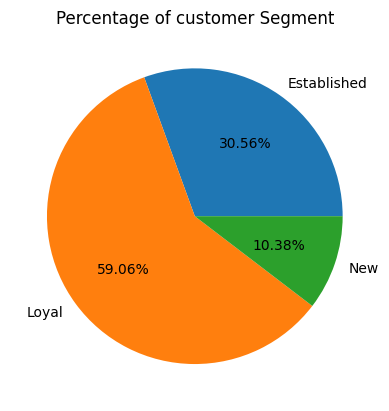

In [185]:
gb=df.groupby('tenure_segment').agg({'tenure_segment':'count'})
plt.pie(gb['tenure_segment'], labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage of customer Segment')
plt.show()

Churn by segment_tenure

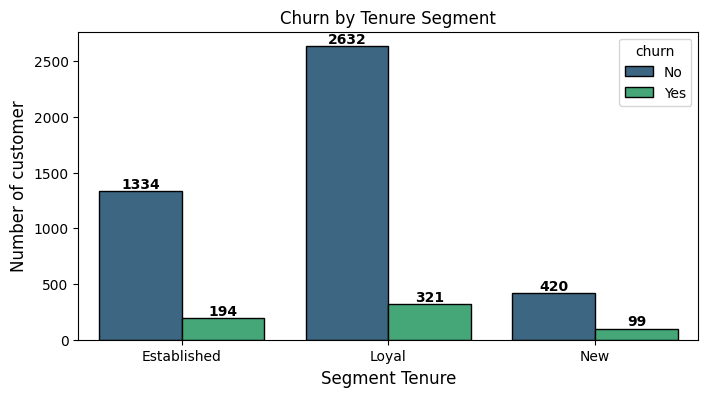

In [189]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='tenure_segment', data=df, hue='churn', palette='viridis', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, weight='bold')
plt.title('Churn by Tenure Segment')
plt.xlabel('Segment Tenure', fontsize=12)
plt.ylabel('Number of customer', fontsize=12)
plt.show()

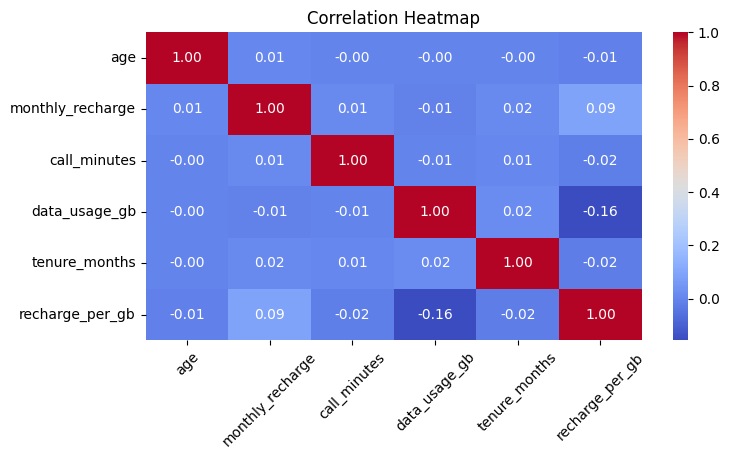

In [197]:
numeric_df=df.select_dtypes(include='number').round(2)
corr=numeric_df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f' )
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()